In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [318]:
df=pd.read_csv("data/StudentPerformanceFactors.csv")

In [319]:
df = df[df['Hours_Studied'] <= 12]

In [320]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [321]:
df.drop(columns=['Gender','School_Type'], inplace=True)

In [322]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
13,9,82,Medium,Medium,Yes,8,72,Medium,Yes,2,Medium,Medium,Positive,3,No,Postgraduate,Near,66
14,10,78,Medium,High,Yes,8,74,Medium,Yes,1,Low,Medium,Neutral,4,No,Postgraduate,Near,65
19,12,75,Medium,High,Yes,7,58,Medium,Yes,3,Medium,Medium,Positive,4,No,College,Near,66
23,11,78,High,Medium,Yes,8,100,High,Yes,1,Low,Medium,Neutral,3,No,High School,Moderate,66
37,8,99,Medium,Medium,No,9,54,Low,Yes,2,Low,Medium,Neutral,5,No,Postgraduate,Near,67


In [323]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

In [324]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               11
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       8
Distance_from_Home             7
Exam_Score                     0
dtype: int64

In [325]:
print(df['Teacher_Quality'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Distance_from_Home'].unique())

['Medium' 'High' 'Low' nan]
['Postgraduate' 'College' 'High School' nan]
['Near' 'Moderate' 'Far' nan]


In [326]:
print(df['Teacher_Quality'].value_counts())
print("_______________________________")
print(df['Parental_Education_Level'].value_counts())
print("_______________________________")
print(df['Distance_from_Home'].value_counts())

Teacher_Quality
Medium    410
High      213
Low        69
Name: count, dtype: int64
_______________________________
Parental_Education_Level
High School     347
College         211
Postgraduate    137
Name: count, dtype: int64
_______________________________
Distance_from_Home
Near        427
Moderate    199
Far          70
Name: count, dtype: int64


In [327]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [328]:
df[numerical_cols].corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,0.024057,-0.064474,-0.038058,-0.013127,0.022438,0.145624
Attendance,0.024057,1.000000,-0.008864,-0.046426,0.048518,-0.026394,0.577960
Sleep_Hours,-0.064474,-0.008864,1.000000,-0.072507,-0.007853,0.027879,-0.014249
Previous_Scores,-0.038058,-0.046426,-0.072507,1.000000,0.021321,0.003101,0.143841
Tutoring_Sessions,-0.013127,0.048518,-0.007853,0.021321,1.000000,0.044016,0.201834
Physical_Activity,0.022438,-0.026394,0.027879,0.003101,0.044016,1.000000,0.030993
Exam_Score,0.145624,0.577960,-0.014249,0.143841,0.201834,0.030993,1.000000


In [329]:
for col in categorical_cols:
    print(df[col].value_counts())
    print("_______________________________")

Parental_Involvement
Medium    357
High      216
Low       130
Name: count, dtype: int64
_______________________________
Access_to_Resources
Medium    353
High      213
Low       137
Name: count, dtype: int64
_______________________________
Extracurricular_Activities
Yes    426
No     277
Name: count, dtype: int64
_______________________________
Motivation_Level
Medium    346
Low       201
High      156
Name: count, dtype: int64
_______________________________
Internet_Access
Yes    642
No      61
Name: count, dtype: int64
_______________________________
Family_Income
Low       307
Medium    271
High      125
Name: count, dtype: int64
_______________________________
Teacher_Quality
Medium    421
High      213
Low        69
Name: count, dtype: int64
_______________________________
Peer_Influence
Neutral     289
Positive    273
Negative    141
Name: count, dtype: int64
_______________________________
Learning_Disabilities
No     629
Yes     74
Name: count, dtype: int64
__________________

In [330]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Parental_Involvement', 'Access_to_Resources','Parental_Education_Level','Distance_from_Home',
              'Motivation_Level','Family_Income','Teacher_Quality', 'Peer_Influence', ]
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Extracurricular_Activities', 
                                 'Internet_Access','Learning_Disabilities'], drop_first=True,dtype=int)

In [331]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes
13,9,82,2,2,8,72,2,2,2,2,2,3,2,2,66,1,1,0
14,10,78,2,0,8,74,2,1,1,2,1,4,2,2,65,1,1,0
19,12,75,2,0,7,58,2,3,2,2,2,4,0,2,66,1,1,0
23,11,78,0,2,8,100,0,1,1,2,1,3,1,1,66,1,1,0
37,8,99,2,2,9,54,1,2,1,2,1,5,2,2,67,0,1,0


In [332]:
from sklearn.model_selection import train_test_split

X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
numerical_cols.remove('Exam_Score')

In [334]:
df['Exam_Score'].max()

np.int64(92)

In [335]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [336]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('xgb', XGBRegressor(random_state=42))  
])


In [337]:
param_grid = {
    'xgb__n_estimators': [50,100, 150, 200],
    'xgb__max_depth': [3, 5, 7, 8, 9, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1]
}
grid_search = GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring='r2',cv=5,verbose=1,n_jobs=-1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'xgb__colsample_bytree': [0.8, 1], 'xgb__learning_rate': [0.01, 0.1, ...], 'xgb__max_depth': [3, 5, ...], 'xgb__n_estimators': [50, 100, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [338]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1.30
MSE: 10.28
RMSE: 3.21
R² Score: 0.31


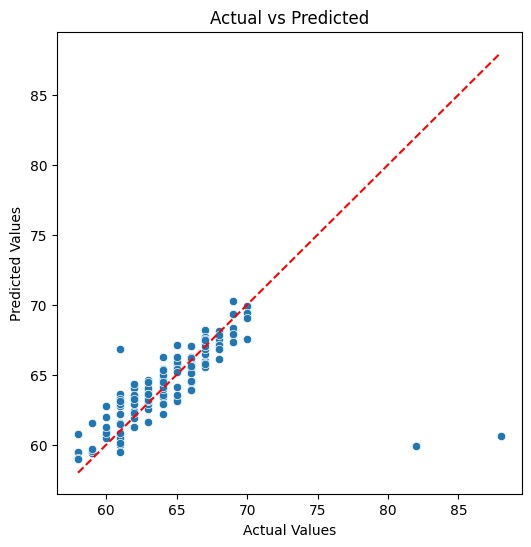

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


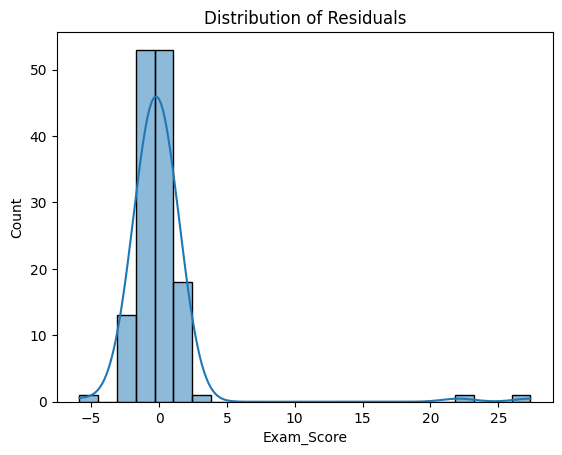

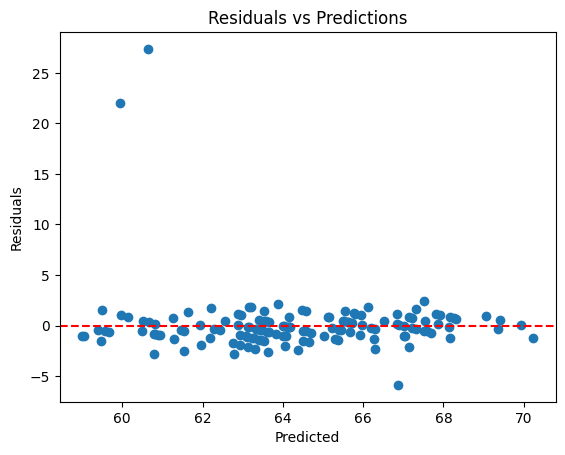

In [340]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()
